In [1]:
# -*- coding: utf-8 -*-
"""
Created on Mon Apr 12 17:39:34 2021

@author: pmarc
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts
import statsmodels.api as stm
import statsmodels.stats.weightstats as ws
import math


In [2]:
### exemplo hockey

donnee = pd.read_csv('../Fichiers/JoueursHockeyv0r1.csv')
stats=donnee.describe()
dimensions=donnee.shape
nomsvariables = pd.DataFrame(donnee.columns)


11.021670192822583
10.202724486759887
8.747804389254087
9.919064317501391
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
0.07646505759494053
F_onewayResult(statistic=array([2.29442079]), pvalue=array([0.07646506]))


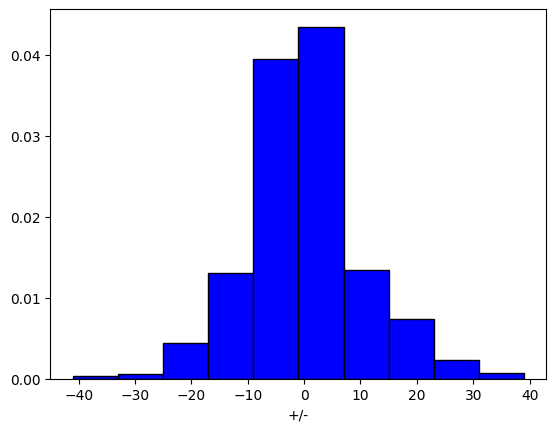

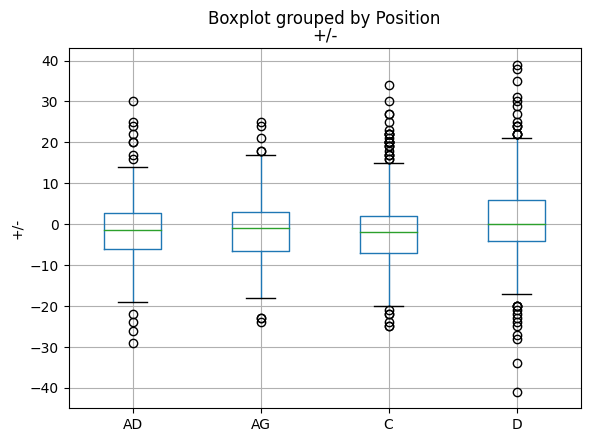

In [10]:
### + ou - jogador na quadra

ax=plt.hist(donnee["+/-"],density=True, bins = 10, color = 'blue', edgecolor = 'black')
plt.xlabel("+/-")

ax = donnee.boxplot(by="Position", column="+/-")
ax.set_xlabel('')
ax.set_ylabel("+/-")


ValD=donnee[(donnee["Position"]=="D")]["+/-"].values.reshape(-1,1)
ValC=donnee[(donnee["Position"]=="C")]["+/-"].values.reshape(-1,1)
ValAG=donnee[(donnee["Position"]=="AG")]["+/-"].values.reshape(-1,1)
ValAD=donnee[(donnee["Position"]=="AD")]["+/-"].values.reshape(-1,1)

print(ValD.std())
print(ValC.std())
print(ValAG.std())
print(ValAD.std())


N=dimensions[0]
g=4
nD=ValD.shape[0]
nC=ValC.shape[0]
nAG=ValAG.shape[0]
nAD=ValAD.shape[0]
ytbar=donnee["+/-"].mean()
SSET=nD*((ValD.mean()-ytbar)**2)+nC*((ValC.mean()-ytbar)**2)+nAG*((ValAG.mean()-ytbar)**2)+nAD*((ValAD.mean()-ytbar)**2)
SSIT=((ValD-ValD.mean())**2).sum()+((ValC-ValC.mean())**2).sum()+((ValAG-ValAG.mean())**2).sum()+((ValAD-ValAD.mean())**2).sum()
SST=((ValD-ytbar)**2).sum()+((ValC-ytbar)**2).sum()+((ValAG-ytbar)**2).sum()+((ValAD-ytbar)**2).sum()
MSEET=SSET/(g-1)
MSEIT=SSIT/(N-g)
MSET=SST/(N-1)

## o q interessa é o F0
F0=MSEET/MSEIT
CV=sts.f.isf(0.05,g-1,N-g)
p_value=sts.f.sf(F0,g-1,N-g)
p_value_fonction_directe=sts.f_oneway(ValD,ValC,ValAG,ValAD)

#print("ValD: ", ValD)
#print("ValC: ", ValC)
#print("ValAG: ", ValAG)
#print("ValAD: ", ValAD)
print(type(ValD))
print(type(ValC))
print(type(ValAG))
print(type(ValAD))
print(p_value)
print(p_value_fonction_directe)

### pvalue > 0.05 ---> Aceita-se a hipótese nula. 
## Não existe uma diferença significativa entre todas as médias

In [ ]:


"Différence entre 2 moyennnes"

print(ValD.mean())
print(ValC.mean())
print(ValAG.mean())
print(ValAD.mean())

pvalue = sts.ttest_ind(ValD,ValC)

